In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from pathlib import Path
import random

In [27]:
p = Path("./datasets/")
dirs = p.glob('*')

In [24]:
for d in dirs:
    print(d)

datasets\Arbok
datasets\Charizard
datasets\Pikachu


In [28]:
image_data = []
labels = []
image_paths = []
label_dict = {"Arbok":0, "Charizard":1, "Pikachu":2}


for d in dirs:
    label = str(d).split("\\")[-1]
    print(f"Label : {label}")
    count = 0

    for i in d.glob('*.jpg'):
        img = image.load_img(i, target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        image_paths.append(i)
        labels.append(label_dict[label])
        count += 1
    print(count)

Label : Arbok
63
Label : Charizard
52
Label : Pikachu
199


In [31]:
print(f"Length of Image_data : {len(image_data)}")
print(f"Length of labels : {len(labels)}")

Length of Image_data : 314
Length of labels : 314


In [34]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Creating numpy arrays for both 

In [58]:
X = np.array(image_data)
Y = np.array(labels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

X = X / 255.0

In [59]:
X.shape

(314, 100, 100, 3)

In [60]:
label_dict_pokemon = {0:"Arbok", 1:"Charizard", 2:"Pikachu"}

In [61]:
def showimage(img, label):
    plt.title(label_dict_pokemon[label])
    plt.imshow(img)
    

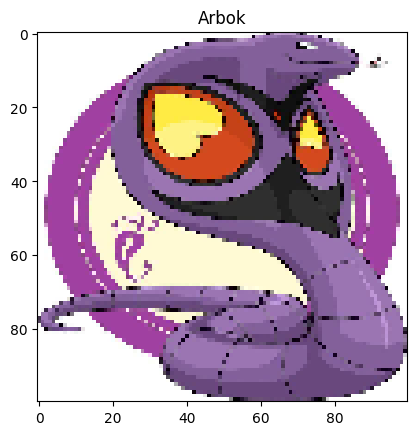

In [64]:
showimage(X[2], Y[2])

In [65]:
print(Y)

[2 2 0 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 0 0 1 0 0 0 1 2 1 2 2 1 2 2 0 0 2 2
 2 1 2 2 2 2 2 2 1 2 1 2 2 2 0 0 2 2 0 2 2 2 2 1 1 2 0 1 1 2 1 2 0 2 2 2 2
 1 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 1 2 2 2 1 0 2 2 0 1 2 2 0 2
 1 2 2 2 2 1 2 2 0 1 0 2 0 1 1 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 0
 2 2 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 1 0 2 2 2 0 2 2 2 2 2 0 2 2 1
 2 0 1 0 2 2 1 2 2 2 1 2 2 0 1 2 2 0 0 0 1 2 2 2 2 1 0 2 2 2 2 0 0 2 2 1 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 0 1 2 1 2 2 0 0 2 1 2 2
 0 2 2 1 0 0 1 1 2 2 1 2 2 2 2 2 0 2 2 2 0 2 0 1 0 2 2 2 1 2 0 0 0 0 2 1 2
 2 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 0 2]


In [73]:
from skimage.transform import resize

X_resized = np.array([resize(img, (50, 50, 3)) for img in X])

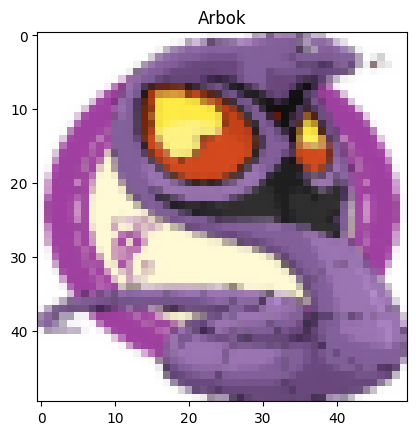

In [75]:
showimage(X_resized[2], Y[2])

In [126]:
split = int(X_resized.shape[0]*0.8)

X_train = X_resized[:split, :]
Y_train = Y[:split]

X_test = X_resized[split:, :]
Y_test = Y[split:]


In [111]:
X_train.shape

(251, 50, 50, 3)

In [127]:
X_test.shape

(63, 50, 50, 3)

In [113]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [114]:
class Neural_network:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)

        model = {}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['B1'] = np.zeros((1, layers[0]))

        model['W2'] = np.random.randn(layers[0], layers[1])
        model['B2'] = np.zeros((1, layers[1]))

        model['W3'] = np.random.randn(layers[1], output_size)
        model['B3'] = np.zeros((1, output_size))

        self.model = model

    def softwmax(self, z):
        e_pa = np.exp(z)
        ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
        return ans

    def forward(self, x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']

        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1) #sigmoid function

        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2) #sigmoid function

        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3) #sigmoid function

        self.acitvation_outputs = (a1,a2,y_)
        return y_

    def backward(self, x, y, learning_rate = 0.001):
        w1, w2, w3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['B1'], self.model['B3'], self.model['B3']

        a1, a2, y_ = self.acitvation_outputs
        delta3 = y_ - y
        m = x.shape[0]

        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)

        delta2 = (1-np.square(a2))*np.dot(delta3, w3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)/float(m)

        delta1 = (1-np.square(a1))*np.dot(delta2, w2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0)/float(m)

        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3

        self.model['B1'] -= learning_rate*db1
        self.model['B2'] -= learning_rate*db2
        self.model['B3'] -= learning_rate*db3

    def predict(self, x):
        y_prediction = self.forward(x)
        return np.argmax(y_prediction, axis=1)
    
    def print_information(self):
        W1,W2,W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1,a2,y_ = self.acitvation_outputs

        print(f"W1 = {W1.shape}")
        print(f"A1 = {a1.shape}")

        print(f"W2 = {W2.shape}")
        print(f"A2 = {a2.shape}")

        print(f"W3 = {W3.shape}")
        print(f"Y_predictions = {y_.shape}")
        


In [115]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def onehot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [116]:
def train(X,Y, model, epochs, learning_rate, logs=True):
    losses = []

    classes = 3
    Y_OHT = onehot(Y, classes)

    for i in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        losses.append(l)
        model.backward(X,Y_OHT, learning_rate)

        if (logs):
            print(f"Epochs {i} Loss {l}")


    return losses

In [117]:
model = Neural_network(input_size=7500, layers=[100,50],output_size=3)

Flattening images

In [118]:
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)

(251, 7500)


In [128]:
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_test.shape)

(63, 7500)


In [120]:
loss = train(X_train, Y_train, model,1000,0.0002)

Epochs 0 Loss 1.0664284970427031
Epochs 1 Loss 0.9488515716066847
Epochs 2 Loss 0.8715721522126355
Epochs 3 Loss 0.8137048545715341
Epochs 4 Loss 0.7937559197474291
Epochs 5 Loss 0.7630525197007579
Epochs 6 Loss 0.7260352472658436
Epochs 7 Loss 0.681862762138124
Epochs 8 Loss 0.693028192250133
Epochs 9 Loss 0.6414360839034151
Epochs 10 Loss 0.5937217842543806
Epochs 11 Loss 0.6088198692303121
Epochs 12 Loss 0.5785226544389237
Epochs 13 Loss 0.5265484273453873
Epochs 14 Loss 0.4942948755009271
Epochs 15 Loss 0.5423156983008144
Epochs 16 Loss 0.5380581904280842
Epochs 17 Loss 0.49613320812178385
Epochs 18 Loss 0.4876381577423921
Epochs 19 Loss 0.45849823268455014
Epochs 20 Loss 0.4170767501077409
Epochs 21 Loss 0.4504911919111693
Epochs 22 Loss 0.4108041037809697
Epochs 23 Loss 0.4056307104864334
Epochs 24 Loss 0.3739964184956228
Epochs 25 Loss 0.3714258080799145
Epochs 26 Loss 0.353762613051906
Epochs 27 Loss 0.3552012015111739
Epochs 28 Loss 0.33123475922177614
Epochs 29 Loss 0.3238470

In [122]:
plt.plot(loss)

In [132]:
# X_test_flat = X_test.reshape(X_test.shape[0], -1)
predictions = model.predict(X_test)


In [125]:
# predictions = model.predict(X_test)

ValueError: shapes (63,50,50,3) and (7500,100) not aligned: 3 (dim 3) != 7500 (dim 0)

In [133]:
predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2],
      dtype=int64)

In [134]:
Y_test

array([2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2])

In [135]:
print(f"Accuracy : {np.sum(predictions==Y_test)/Y_test.shape[0]}")

Accuracy : 0.6349206349206349


In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.00      0.00      0.00         8
           2       0.86      0.70      0.78        44

    accuracy                           0.63        63
   macro avg       0.47      0.51      0.48        63
weighted avg       0.70      0.63      0.66        63



In [138]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [139]:
cnf_matrix = confusion_matrix(predictions, Y_test)

In [140]:
cnf_matrix

array([[ 9,  2,  0],
       [ 3,  0,  5],
       [ 4,  9, 31]], dtype=int64)

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
# cnf_matrix = confusion_matrix(predictions, Y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=label_dict_pokemon.values())
disp.plot(cmap=plt.cm.Blues)

# Add title and axis labels
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
# Display the plot
# plt.show()
